# Custom Gym Environments

In [1]:
from gym import Env
from gym.spaces import Discrete, Box
import numpy as np
import matplotlib.pyplot as plt
import random
from stable_baselines3 import DQN
from stable_baselines3.common.env_checker import check_env

### Creating a custom environment

This environment represents controlling the shower temperature to be within a particular range. See the [this tutorial](https://www.youtube.com/watch?v=bD6V3rcr_54) by Nicholas Renotte for more details.

In [2]:
class ShowerEnv(Env):
    def __init__(self):
        self.action_space = Discrete(3)
        self.observation_space = Box(low=np.array([0]), high=np.array([100]), dtype=int)
        self.state = 38 + random.randint(-3,3)
        self.obs = np.array([self.state])
        self.history = [self.state]
        self.shower_length = 60
    
    def step(self, action):
        # Apply action
        self.state += action - 1 + random.randint(-1,1) # apply action and randomness
        self.obs = np.array([self.state])
        self.history.append(self.state)
        self.shower_length -= 1
        
        # Calculate reward
        if self.state>=37 and self.state<=39:
            reward = 1
        else:
            reward = -1
        
        # Check if shower is done
        if self.shower_length<=0:
            done = True
        else:
            done = False
        
        # Return step data
        info = {} # placeholder
        return self.obs, reward, done, info
    
    def render(self):
        plt.xlabel('Time (min)')
        plt.ylabel('Temperature (°C)')
        plt.plot(self.history, '.-', lw=0.4)
        plt.axhspan(37, 39, facecolor='green', alpha=0.1)
    
    def reset(self):
        self.state = 38 + random.randint(-3,3)
        self.obs = np.array([self.state])
        self.history = [self.state]
        self.shower_length = 60
        return self.obs

In [3]:
env = ShowerEnv();

In [4]:
check_env(env) # environment checker function from SB3

In [5]:
print('sample action:', env.action_space.sample())
print('sample observation:', env.observation_space.sample())

sample action: 2
sample observation: [100]


### Taking random actions

112210011211012120121222110010010002202222001221202000002220	 Episode: 0 	 Score: -60
010102102202220112210211020101210100010110202202121220001212	 Episode: 1 	 Score: -28
021200010210002012110011120220212202010222202220201001212212	 Episode: 2 	 Score: -38
110122201012010102200220011022122112101120002201112021111200	 Episode: 3 	 Score: 10
010212021220212012000111110002100000211012202010010212201010	 Episode: 4 	 Score: -60


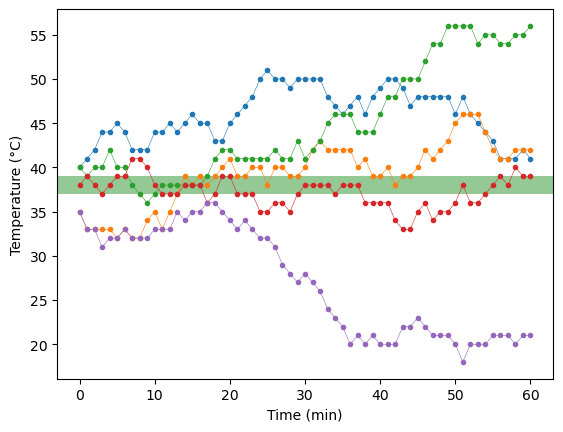

In [6]:
# Visualizing random actions
episodes = 5
for episode in range(episodes):
    obs = env.reset()
    done = False
    score = 0
    
    while not done:
        action = env.action_space.sample()
        print(action, end='')
        obs, reward, done, info = env.step(action)
        score += reward
    
    print(f'\t Episode: {episode} \t Score: {score}')
    env.render();
    
env.close()

### Training a DQN model

In [7]:
model = DQN('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=10_000)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 60       |
|    ep_rew_mean      | -40      |
|    exploration_rate | 0.772    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 11100    |
|    time_elapsed     | 0        |
|    total_timesteps  | 240      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 60       |
|    ep_rew_mean      | -30.8    |
|    exploration_rate | 0.544    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 11890    |
|    time_elapsed     | 0        |
|    total_timesteps  | 480      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 60       |
|    ep_rew_mean      | -34.7 

000000000000000000000000000000000000000000111121100000000000	 Episode: 0 	 Score: -58
000000000000000000000000000000000001111000000000000000000000	 Episode: 1 	 Score: -60
000000001000000000000000000000000000000000001000100010111111	 Episode: 2 	 Score: -36
000000000000000100000000001111111111111111111111001101011111	 Episode: 3 	 Score: -60
000000000000000000000000000000100000000101111111100000000000	 Episode: 4 	 Score: -54


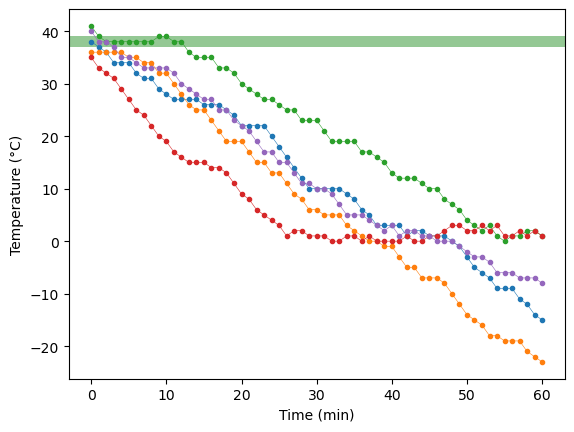

In [8]:
# Visualizing model performance
episodes = 5
for episode in range(episodes):
    obs = env.reset()
    done = False
    score = 0
    
    while not done:
        action, _ = model.predict(obs)
        print(action, end='')
        obs, reward, done, info = env.step(action)
        score += reward
    
    print(f'\t Episode: {episode} \t Score: {score}')
    env.render();
    
env.close()

Clearly `DQN` is overkill for this environment, but that's not the point. The point is that we can make **custom environments** to interact with `stable-baselines3`!